Practice for Data Examination

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#to scale data using z-score
from sklearn.preprocessing import StandardScaler

#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [4]:
auto = pd.read_csv('auto-mpg.csv')
auto.describe()
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [5]:
auto['car name'].nunique()
auto_save = auto.copy()
auto = auto.drop(['car name'], axis = 1)
hp_is_digit = auto['horsepower'].str.isdigit()
auto[hp_is_digit == False]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


In [6]:
auto = auto.replace('?', np.nan) #replaces all ? with np.nan
auto[hp_is_digit == False]
auto.horsepower.fillna(auto.horsepower.median(), inplace = True) #replace horsepower with the mediqan horsepower
auto[hp_is_digit == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,93.5,2046,19.0,71
126,21.0,6,200.0,93.5,2875,17.0,74
330,40.9,4,85.0,93.5,1835,17.3,80
336,23.6,4,140.0,93.5,2905,14.3,80
354,34.5,4,100.0,93.5,2320,15.8,81
374,23.0,4,151.0,93.5,3035,20.5,82


In [7]:
auto.info() #horsepower is still an object
auto.horsepower = auto.horsepower.astype('float64')
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 21.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float6

In [8]:
auto.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


mpg
Skew : 0.5


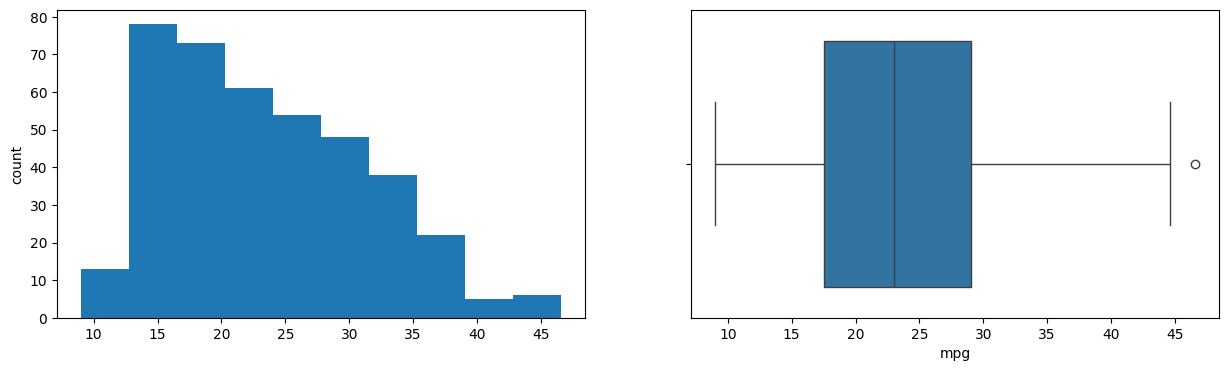

cylinders
Skew : 0.5


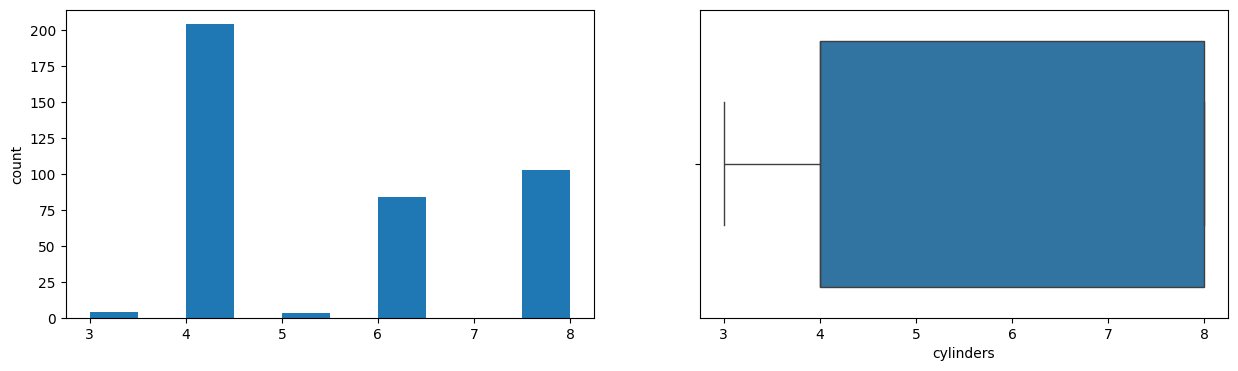

displacement
Skew : 0.7


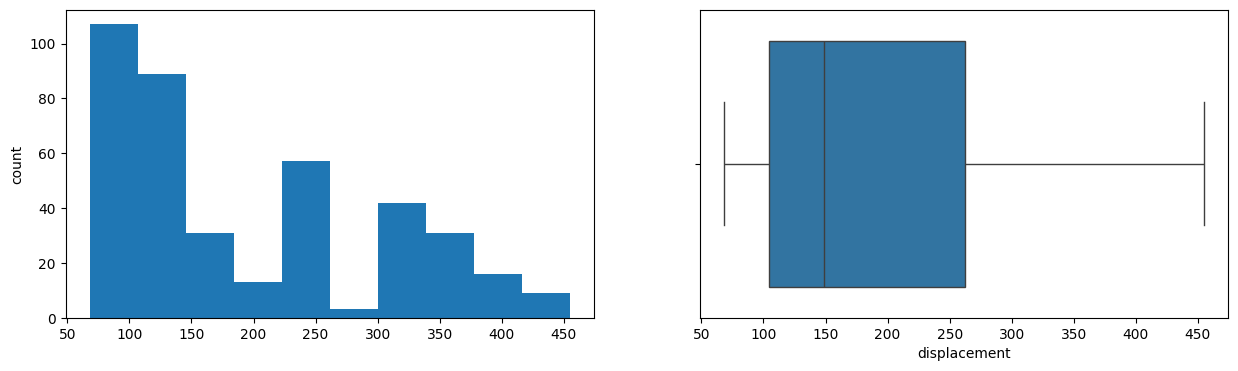

horsepower
Skew : 1.1


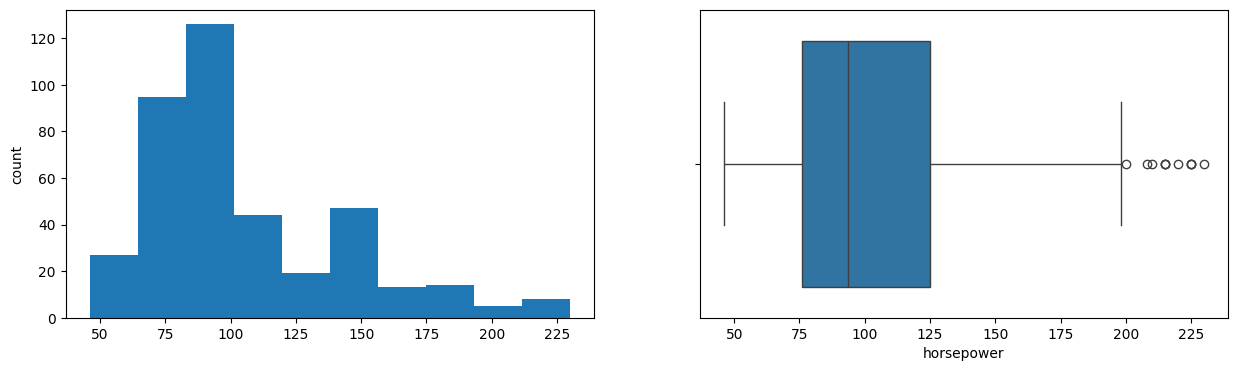

weight
Skew : 0.5


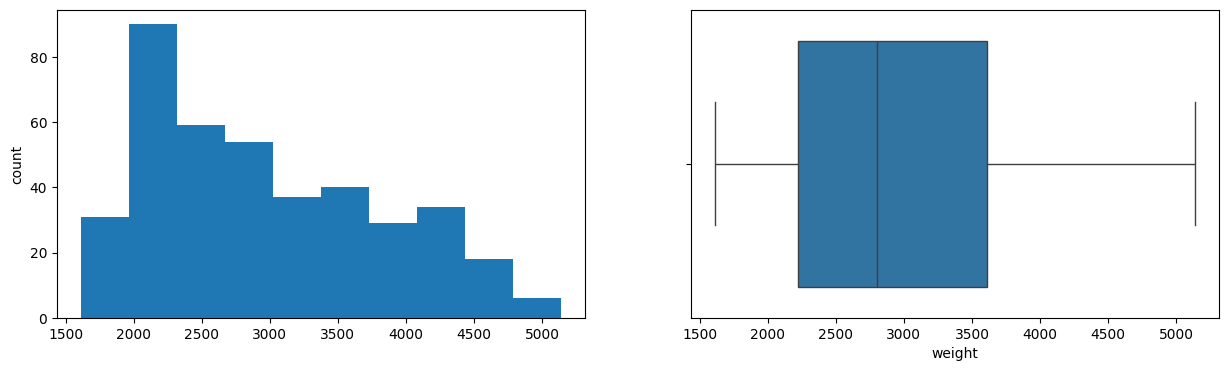

acceleration
Skew : 0.3


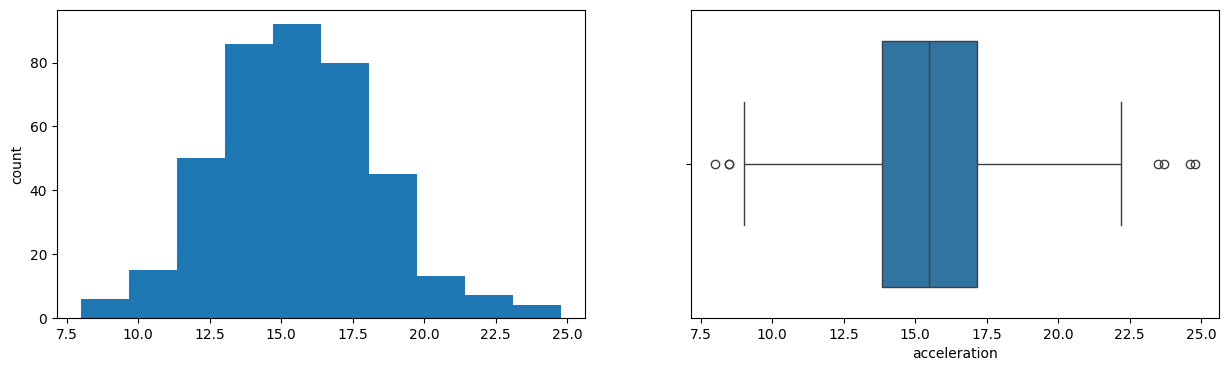

model year
Skew : 0.0


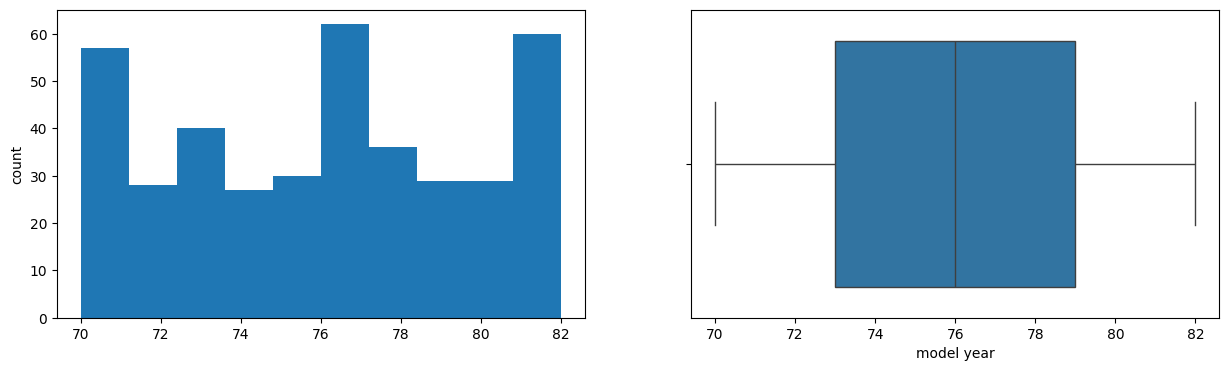

In [9]:
for col in auto.columns:
    print(col)
    print('Skew :', round(auto[col].skew(), 1))
    plt.figure(figsize = (15,4))
    plt.subplot(1,2,1)
    auto[col].hist(bins = 10, grid = False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=auto[col])
    plt.show()

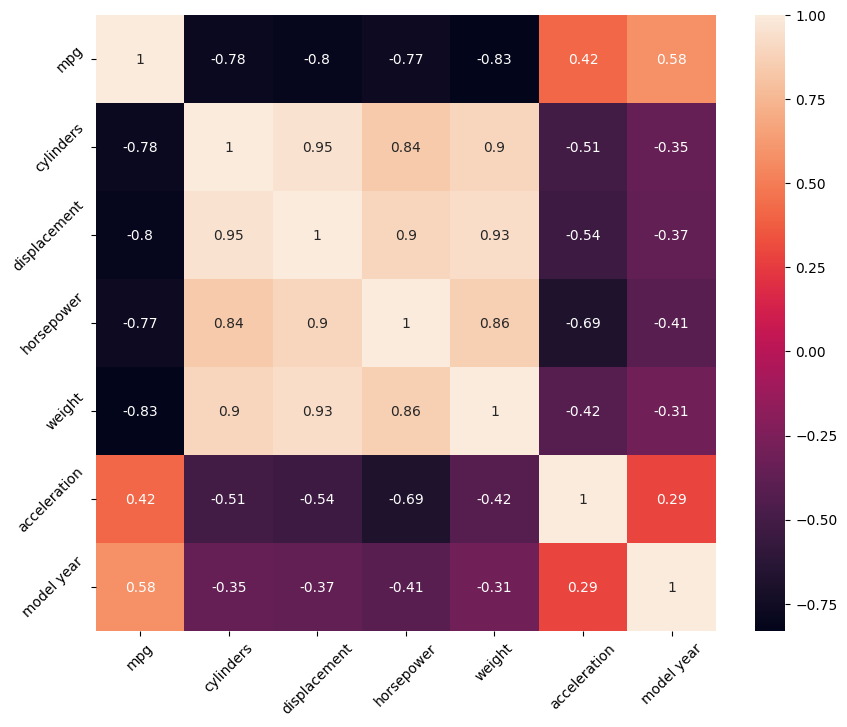

In [18]:
plt.figure(figsize = (10,8))
sns.heatmap(auto.corr(), annot = True)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

plt.figure(figsize = (10,10))

## Observations
- displacement and cylinder have a strong correlation 
- horsepower and weight and closley correlated
- displacement/weight and mpg are negatively correlated
- There is negative correlation between horsepower and acceleration


In [21]:
scaler = StandardScaler()
auto_scaled = pd.DataFrame(scaler.fit_transform(auto), columns = auto.columns)

In [25]:
auto_scaled.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


## Principal Component Analysis

In [40]:
n = auto_scaled.shape[1] #taking number of columns or individual features from auto

pca = PCA(n_components=n, random_state=1)
auto_pca1 = pd.DataFrame(pca.fit_transform(auto_scaled))

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

x = exp_var.cumsum()
x

array([0.71476787, 0.83842327, 0.94256368, 0.96928336, 0.98706953,
       0.99497842, 1.        ])

(0.5, 1.05)

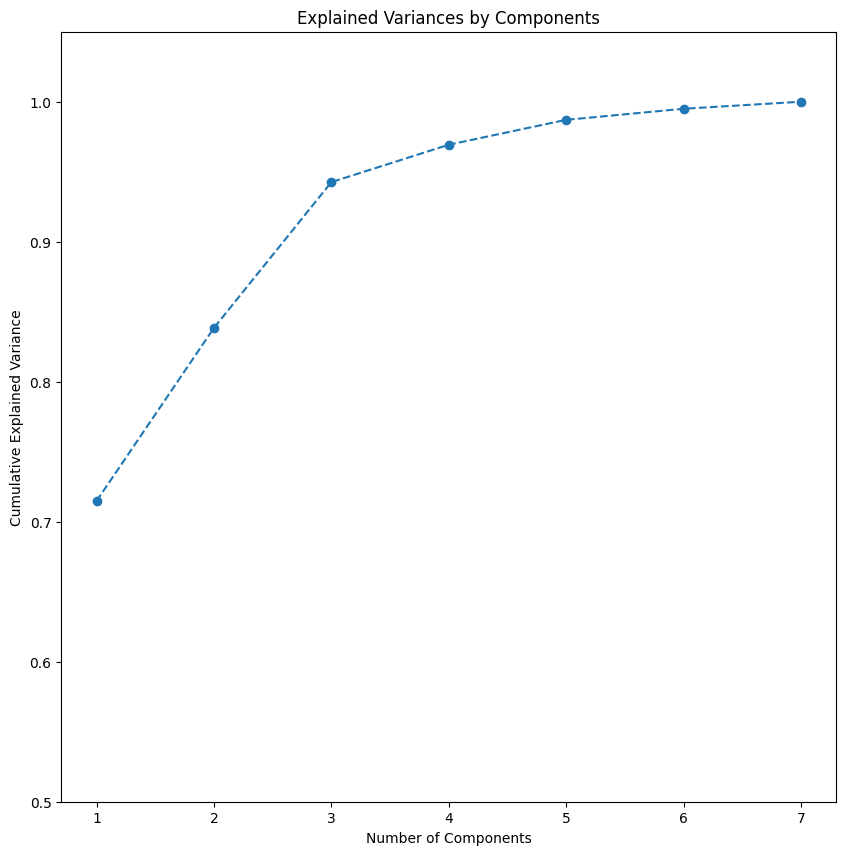

In [39]:
plt.figure(figsize=(10,10))
plt.plot(range(1,8), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variances by Components')
plt.xlabel("Number of Components")
plt.ylabel('Cumulative Explained Variance')
plt.ylim([.5,1.05])